<a href="https://colab.research.google.com/github/mobilttterbang/Garbage-Identification-Project/blob/main/Garbage_Image_Idenification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **=====GARBAGE CLASSIFICATION=====**
Here, we'll make a classification model for garbage image dataset using CNN algorithm.

Early Steps :

1. Import the dataset from kaggle
2. Create new API by downloading kaggle.json
3. Set up the environment
4. Preprocessing the Data
5. Split the Data
6. Model Construction
7. Model Testing
8. Model Evaluation

## **SET UP COLAB NOTEBOOKS**

In [ ]:
# SETUP THE COLAB NOTEBOOKS

# install library for kaggle
# !pip install kaggle

# connect to the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# create directory to save the kaggle.json API
!mkdir ~/.kaggle
!mkdir /content/Garbage\ Dataset
!mkdir /content/Garbage\ Dataset\ Index

In [ ]:
# move files into root directory
!cp /content/gdrive/My\ Drive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# download datasets from my kaggle
!kaggle datasets download -d fthnaja/garbage-image-dataset --force --unzip -p /content/Garbage\ Dataset

 61% 25.0M/40.8M [00:00<00:00, 88.5MB/s]
100% 40.8M/40.8M [00:00<00:00, 116MB/s] 


In [ ]:
# move index files to index folder
import os

data_dir = '/content/Garbage Dataset'
idx_dir = '/content/Garbage Dataset Index'

for file in os.listdir(data_dir):
    if file.endswith('.txt'):
        os.rename(os.path.join(data_dir, file), os.path.join(idx_dir, file))

In [ ]:
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.15.0


In [ ]:
# avoid OOM error by set the GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

# print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[]


## **Remove Dodgy Images**
- remove much small images
- remove unrelated images

In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [ ]:
img_ext = ['jpg', 'jpeg', 'bmp', 'png']

In [ ]:
# remove the dodgy image
# os.listdir(os.path.join('plastic'))

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            format = imghdr.what(image_path)
            if format not in img_ext:
                print(f'image {image_path} format not in the list')
                print(image.index())
                os.remove(image_path)
        except Exception as e:
            print(f'there\'s issue with image {image_path}')
            # os.remove(image_path)

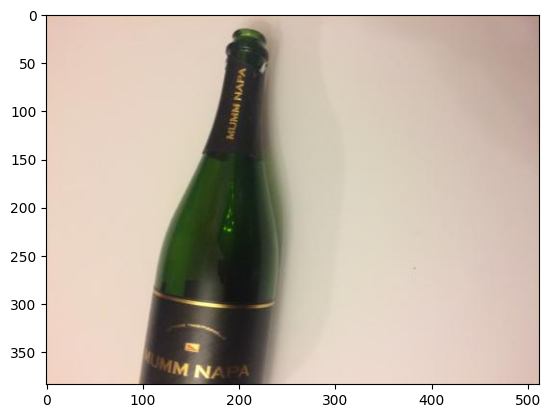

In [ ]:
# sample image
exp_class = os.listdir(data_dir)[3]
exp_image = os.listdir(os.path.join(data_dir, exp_class))[0]
exp = cv2.imread(os.path.join(data_dir, exp_class, exp_image))

# plot image
# note that opencv use BGR instead of RGB color, so...
plt.imshow(cv2.cvtColor(exp, cv2.COLOR_BGR2RGB))
plt.show()

## **Load Data**

In [ ]:
# SPLIT THE DATA FIRST
os.listdir(idx_dir)

['zero-indexed-files.txt',
 'one-indexed-files-notrash_val.txt',
 'one-indexed-files-notrash_test.txt',
 'one-indexed-files-notrash_train.txt',
 'one-indexed-files.txt']

In [ ]:
import pandas as pd

train_idx = os.listdir(idx_dir)[3]
test_idx = os.listdir(idx_dir)[2]
val_idx = os.listdir(idx_dir)[1]

train_idx_dir = os.path.join(idx_dir, train_idx)
test_idx_dir = os.path.join(idx_dir, test_idx)
val_idx_dir = os.path.join(idx_dir, val_idx)


# train_data = open(train_idx_dir, 'r+')
train = pd.read_csv(train_idx_dir, sep = '\ ', header = None)
train = list(train[0])
print(len(train))

test = pd.read_csv(test_idx_dir, sep = '\ ', header = None)
test = list(test[0])
print(len(test))

val = pd.read_csv(val_idx_dir, sep = '\ ', header = None)
val = list(val[0])
print(len(val))

1768
431
328


<ipython-input-14-e5a6c5bc49f9>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv(train_idx_dir, sep = '\ ', header = None)
<ipython-input-14-e5a6c5bc49f9>:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(test_idx_dir, sep = '\ ', header = None)
<ipython-input-14-e5a6c5bc49f9>:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  val = pd.read_csv(val_idx_dir, sep = '\ ', head

In [ ]:
!mkdir /content/Garbage\ Train\ Data
!mkdir /content/Garbage\ Test\ Data
!mkdir /content/Garbage\ Val\ Data

In [ ]:
!cp /content/Garbage\ Dataset /content/Garbage\ Train\ Data -r
!cp /content/Garbage\ Dataset /content/Garbage\ Test\ Data -r
!cp /content/Garbage\ Dataset /content/Garbage\ Val\ Data -r

In [ ]:
def remove_images(idx_image, dir):
    for groups in os.listdir(dir):
        for image in os.listdir(os.path.join(dir, groups)):
            image_path = os.path.join(dir, groups, image)
            if image not in idx_image:
                os.remove(image_path)
            else:
                pass


train_dir = '/content/Garbage Train Data/Garbage Dataset'
test_dir = '/content/Garbage Test Data/Garbage Dataset'
val_dir = '/content/Garbage Val Data/Garbage Dataset'

In [ ]:
remove_images(train, train_dir)
remove_images(test, test_dir)
remove_images(val, val_dir)

In [ ]:

# ===================================
# ============ LOAD DATA ============
# ===================================

import numpy as np

# Load data using Pipeline
# tf.keras.utils.image_dataset_from_directory??
full_data = tf.keras.utils.image_dataset_from_directory(data_dir)
train = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=32)
test = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=8)
val = tf.keras.utils.image_dataset_from_directory(val_dir, batch_size=6)

Found 2527 files belonging to 6 classes.
Found 1768 files belonging to 6 classes.
Found 431 files belonging to 6 classes.
Found 328 files belonging to 6 classes.


In [ ]:
# Calculate steps per epoch for training
train_steps_per_epoch = len(train) // 32  # Assuming batch_size is 32
# Calculate steps per epoch for validation
val_steps_per_epoch = len(val) // 6  # Assuming batch_size is 6

# Apply the repeat function to the datasets
train = train.repeat()
test = test.repeat()
val = val.repeat()

In [ ]:
# since the datasets are now in generator format
# we need to read the generator using numpy iterator
train_iterator = train.as_numpy_iterator()
test_iterator = test.as_numpy_iterator()
val_iterator = val.as_numpy_iterator()

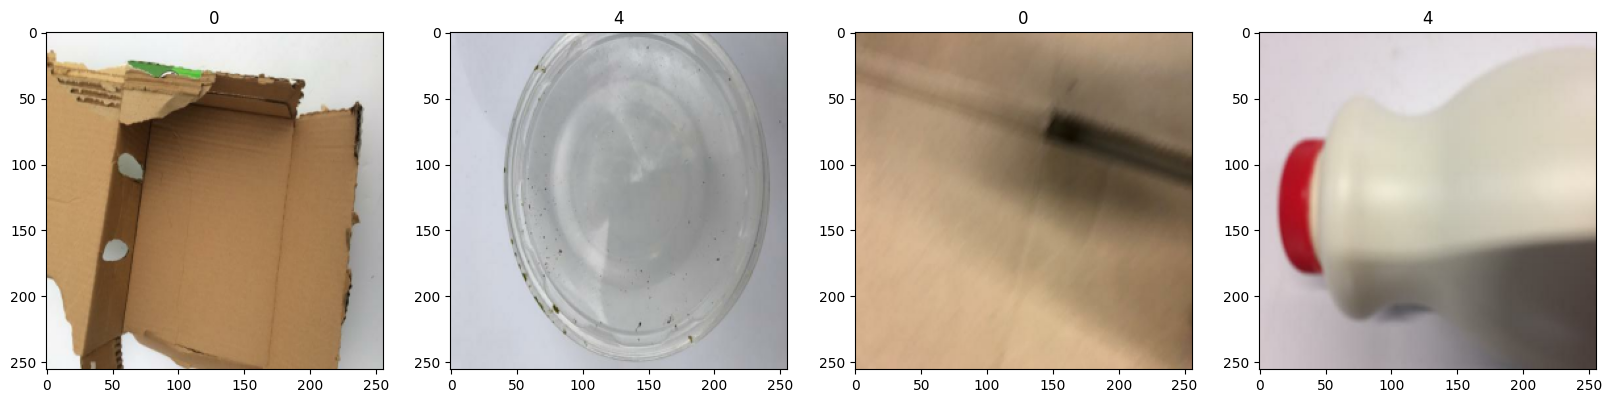

In [ ]:
# Let's see some examples
batch = train_iterator.next()

fig, ax = plt.subplots(ncols = 4, figsize = (20,8))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])

## **PREPROCESS DATA**

### **Scale Data**

In [ ]:
scaled_train = train.map(lambda x, y:(x/255, y))
scaled_test = test.map(lambda x, y:(x/255, y))
scaled_val = val.map(lambda x, y:(x/255, y))
scaled_native = full_data.map(lambda x, y:(x/255, y))

scaled_train_itr = scaled_train.as_numpy_iterator()
scaled_test_itr = scaled_test.as_numpy_iterator()
scaled_val_itr = scaled_val.as_numpy_iterator()
scaled_native_itr = scaled_native.as_numpy_iterator()

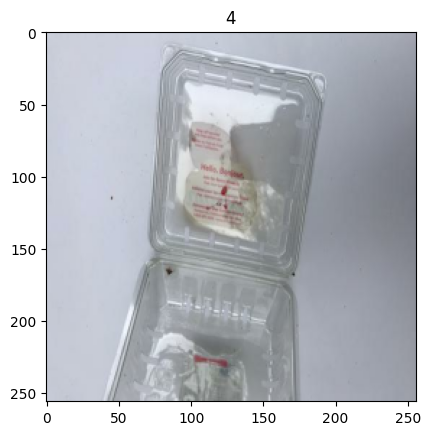

In [ ]:
# see the example
import random

scaled_batch = scaled_train_itr.next()
num = random.randint(0, len(batch[0]))
plt.imshow(scaled_batch[0][num])
plt.title(scaled_batch[1][num])
plt.show()

## **NATIVE SPLITTING**

In [ ]:
# split data : if the indexes aren't choosen

In [ ]:
train_sz = int(len(scaled_native)*.7)
val_sz = int(len(scaled_native)*.2)+1
test_sz = int(len(scaled_native)*.1)+1

In [ ]:
len(scaled_native)

79

In [ ]:
train_sz + test_sz + val_sz

79

In [ ]:
aut_train = scaled_native.take(train_sz)
aut_val = scaled_native.skip(train_sz).take(val_sz)
aut_test = scaled_native.skip(train_sz + val_sz).take(test_sz)

## **BUILD MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:

# input layer
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# second layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

# third layer
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

## **TRAIN THE MODEL**

In [ ]:
!mkdir /content/logs

In [ ]:
logdir = '/content/logs'

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir =logdir)

In [ ]:

# Manual split model
hist = model.fit(
               train,
               epochs=20,
               validation_data=scaled_val_itr,
               steps_per_epoch=56,
               validation_steps=6,
               callbacks=[tensorboard_cb]
             )

In [ ]:

# Native split model
hist = model.fit(
               aut_train,
               epochs=100,
               validation_data=aut_val,
               callbacks=[tensorboard_cb]
             )

Epoch 1/100
55/55 [==============================] - 38s 671ms/step - loss: 1.6230 - accuracy: 0.3017 - val_loss: 1.4996 - val_accuracy: 0.3926
Epoch 2/100
55/55 [==============================] - 37s 663ms/step - loss: 1.3515 - accuracy: 0.4443 - val_loss: 1.3755 - val_accuracy: 0.4707
Epoch 3/100
55/55 [==============================] - 36s 659ms/step - loss: 1.1852 - accuracy: 0.5398 - val_loss: 1.2661 - val_accuracy: 0.4961
Epoch 4/100
55/55 [==============================] - 36s 660ms/step - loss: 0.9240 - accuracy: 0.6528 - val_loss: 1.1721 - val_accuracy: 0.5293
Epoch 5/100
55/55 [==============================] - 36s 657ms/step - loss: 0.7068 - accuracy: 0.7506 - val_loss: 1.2231 - val_accuracy: 0.6172
Epoch 6/100
55/55 [==============================] - 36s 661ms/step - loss: 0.4819 - accuracy: 0.8386 - val_loss: 1.3391 - val_accuracy: 0.6113
Epoch 7/100
55/55 [==============================] - 37s 667ms/step - loss: 0.3612 - accuracy: 0.8852 - val_loss: 1.2362 - val_accuracy:

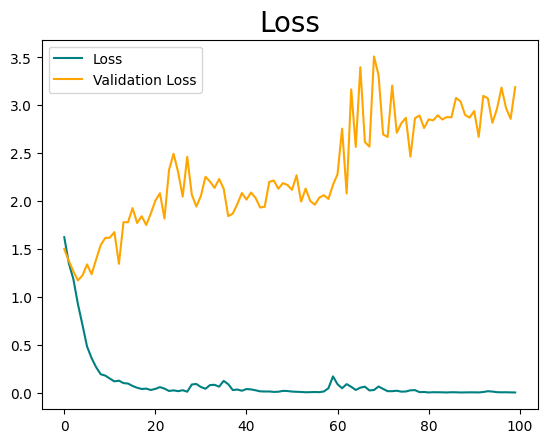

In [ ]:
# plot performance
fig = plt.subplots()
plt.plot(hist.history['loss'], color='teal', label='Loss')
plt.plot(hist.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()